In [18]:
import torch
from torch.utils.data import DataLoader, Subset, random_split
from torchvision import datasets, transforms
import random
import cv2
import matplotlib.pyplot as plt

In [9]:
pic_0 = cv2.imread(r"D:\Waste_Classification_Project\Waste_Classification_Dataset\Metal\IMG_1972.JPG")

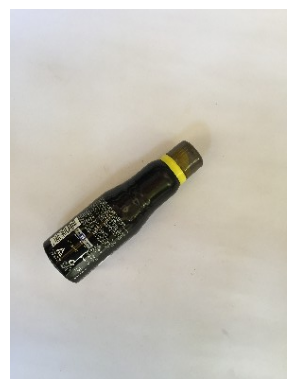

In [10]:
img_rgb = cv2.cvtColor(pic_0, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img_rgb)

In [3]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

In [13]:
# Load all the images
waste_dataset = datasets.ImageFolder(root = r'D:\Waste_Classification_Project\Waste_Classification_Dataset', transform= transform)

In [ ]:
# Due to the limitations in processing capability , we only use a small subset of the total dataset
N = 100     # Number of images
indices = random.sample(range(len(waste_dataset)), N)
subset = Subset(waste_dataset, indices)

In [19]:
# Calculate the size of each dataset
train_size = int(len(subset) * 0.7) 
val_size = int(0.2 * len(subset))
test_size = len(subset) - train_size - val_size
# Split the dataset
train, val, test = random_split(subset, [train_size, val_size, test_size], generator = torch.Generator().manual_seed(42))

In [ ]:
train_loader = DataLoader(train, batch_size= 12, shuffle = True)
val_loader = DataLoader(val, batch_size = 12, shuffle = True)
test_loader = DataLoader(test_size, batch_size = 12, shuffle = True)